<a href="https://colab.research.google.com/github/Harshitha-40/ML-Xplore/blob/main/classfication_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing packages
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/data set/Banknote_Authentication_Classify.csv')
df.head()

,Banknote_ID,Length,Width,Height,Edge_Condition,Security_Features,Watermark,Magnetic_Properties,Color_Fidelity,Counterfeit_Risk
0,7dd61d47-697d-407e-96f5-17e161d86b38,5.306590,7.524517,0.297355,Intact,NaN,1,0,76.464216,0
1,75301829-505a-46ce-96e1-ab8a71f65422,7.981608,9.813148,0.147479,Intact,0.0,1,0,89.164768,0
2,108ee124-8054-4cfb-9163-668510d90d46,6.784135,6.897734,0.401035,Damaged,1.0,1,1,72.331787,1
3,676466e0-ed68-4746-b054-df1c57afaeb4,9.342350,7.119691,0.132217,Damaged,1.0,0,0,97.950321,0
4,49de9e1c-4edc-4363-8bb9-57c989fea69b,11.573266,8.252397,0.167207,Damaged,1.0,1,1,97.006671,1


In [6]:
# See the no. of rows and columns
df.shape

(1150, 10)

In [7]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Banknote_ID', 'Length', 'Width', 'Height', 'Edge_Condition', 'Security_Features', 'Watermark', 'Magnetic_Properties', 'Color_Fidelity', 'Counterfeit_Risk']


In [8]:
# Display data type of each feature
df.dtypes

,0
Banknote_ID,object
Length,float64
Width,float64
Height,float64
Edge_Condition,object
Security_Features,float64
Watermark,int64
Magnetic_Properties,int64
Color_Fidelity,float64
Counterfeit_Risk,int64


In [9]:
df.describe()

,Length,Width,Height,Security_Features,Watermark,Magnetic_Properties,Color_Fidelity,Counterfeit_Risk
count,1067.000000,1024.000000,1150.000000,1044.000000,1150.000000,1150.000000,1150.000000,1150.000000
mean,10.133092,7.478020,0.306041,0.485632,0.526087,0.514783,50.173069,0.534783
std,2.890914,1.408398,0.113707,0.500033,0.499536,0.499999,29.304955,0.499006
min,5.004410,5.000079,0.100413,0.000000,0.000000,0.000000,0.010664,0.000000
25%,7.653362,6.306270,0.208395,0.000000,0.000000,0.000000,24.350458,0.000000
50%,10.207555,7.405865,0.309752,0.000000,1.000000,1.000000,51.522523,1.000000
75%,12.637773,8.641639,0.405091,1.000000,1.000000,1.000000,75.546177,1.000000
max,14.998398,9.994152,0.499773,1.000000,1.000000,1.000000,99.985211,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Banknote_ID          1150 non-null   object 
 1   Length               1067 non-null   float64
 2   Width                1024 non-null   float64
 3   Height               1150 non-null   float64
 4   Edge_Condition       1150 non-null   object 
 5   Security_Features    1044 non-null   float64
 6   Watermark            1150 non-null   int64  
 7   Magnetic_Properties  1150 non-null   int64  
 8   Color_Fidelity       1150 non-null   float64
 9   Counterfeit_Risk     1150 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 90.0+ KB


In [11]:
# find the null values
df.isnull().sum()

,0
Banknote_ID,0
Length,83
Width,126
Height,0
Edge_Condition,0
Security_Features,106
Watermark,0
Magnetic_Properties,0
Color_Fidelity,0
Counterfeit_Risk,0


In [12]:
# Remove unwanted columns
df.drop(columns=['Banknote_ID'], inplace=True)  # specify the columns to remove

In [13]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
num_columns
cat_columns

Index(['Edge_Condition'], dtype='object')

In [14]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [ ]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [15]:
# find the null values
df.isnull().sum()

,0
Length,0
Width,0
Height,0
Edge_Condition,0
Security_Features,0
Watermark,0
Magnetic_Properties,0
Color_Fidelity,0
Counterfeit_Risk,0


In [16]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [17]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [18]:
df.head()

,Length,Width,Height,Edge_Condition,Security_Features,Watermark,Magnetic_Properties,Color_Fidelity,Counterfeit_Risk
0,0.030236,0.505487,0.493144,1,0.485632,1.0,0.0,0.764730,0.0
1,0.297899,0.963756,0.117854,1,0.000000,1.0,0.0,0.891768,0.0
2,0.178080,0.379981,0.752759,0,1.000000,1.0,1.0,0.723395,1.0
3,0.434055,0.424425,0.079636,0,1.000000,0.0,0.0,0.979646,0.0
4,0.657281,0.651236,0.167252,0,1.000000,1.0,1.0,0.970207,1.0


In [19]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Counterfeit_Risk', axis=1)  # -- independent variable
y = df['Counterfeit_Risk'] # -- dependent variable
print(X)

        Length     Width    Height  Edge_Condition  Security_Features  \
0     0.030236  0.505487  0.493144               1           0.485632   
1     0.297899  0.963756  0.117854               1           0.000000   
2     0.178080  0.379981  0.752759               0           1.000000   
3     0.434055  0.424425  0.079636               0           1.000000   
4     0.657281  0.651236  0.167252               0           1.000000   
...        ...       ...       ...             ...                ...   
1145  0.610808  0.572740  0.236448               0           1.000000   
1146  0.974094  0.496176  0.211687               0           0.000000   
1147  0.016201  0.323910  0.591858               0           0.000000   
1148  0.071279  0.899319  0.699875               0           1.000000   
1149  0.276494  0.231455  0.955812               0           0.000000   

      Watermark  Magnetic_Properties  Color_Fidelity  
0           1.0                  0.0        0.764730  
1           1

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Evaluate Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [24]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.5304347826086957
Logistic Regression Confusion Matrix:
 [[23 76]
 [32 99]]


In [26]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [28]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.5565217391304348
Random Forest Confusion Matrix:
 [[47 52]
 [50 81]]


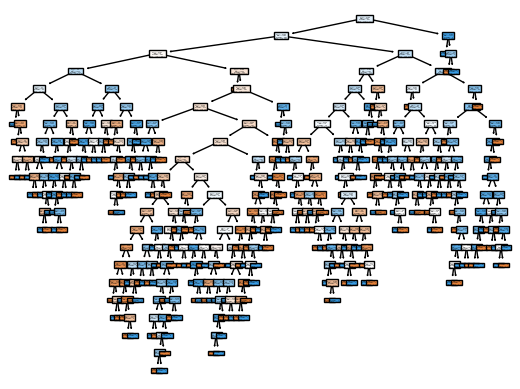

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [30]:
# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [31]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
